### Demonstrate that in a neural network, to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set

#### Softmax function:
1. A softmax function is used to convert the output from last but one layer of the neural network to a vector of probabilities that the given input features belongs to a certain class. 
2. It is generally used as the last layer of the neural network as it makes the neural network's output easier to interpret.
3. An interesting proporty is that the sum of this whole vector equates to 1 (since it is a vector of probabilities).

#### Negative Log-Likelihood:
<center><math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>L</mi>
  <mo stretchy="false">(</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="bold">y</mi>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mo>&#x2212;<!-- − --></mo>
  <mi>log</mi>
  <mo>&#x2061;<!-- ⁡ --></mo>
  <mo stretchy="false">(</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="bold">y</mi>
  </mrow>
  <mo stretchy="false">)</mo>
</math></center>
<br>
1. The softmax function is used along with the negative log-likelihood function.

![picture](https://drive.google.com/uc?id=1lygvod0mFKfbJcCyQLMxMcthPtCjWxKy)

2. Since the value of negative log-likelihood (NLL) decreases with increase in x, it can be seen that when used as a loss function, NLL's value will decrease with increase in probability of the input features being a class.

Considering a 3-class example of cat, dog and horse:
![picture](https://drive.google.com/uc?id=1yFdJo3gLJI-Sf76QfEUCzRNYeFzAWrvD)

Thus, we see that higher confidence of the class leads to lower NLL loss - which is the same as maximizing the log-likelihood.

### Demonstrate that in a neural network, to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution is one that minimizes the criterion function with L2 regularization 

If we want to infer the parameter $\displaystyle \alpha $ from a set of input-output pairs $\displaystyle (x_1,y_1)\dots,(x_N,y_N) $ assuming that the outputs are linearly related to the inputs via $\displaystyle \alpha $ and corrupted by noise $\displaystyle \epsilon $, where $\displaystyle \epsilon $ is Gaussian noise with mean 0 and variance $\displaystyle \sigma^2 $. 
\begin{equation*}
y_n = \beta x_n + \epsilon
\end{equation*}
Gaussian likelihood of noise:
\begin{equation*}
\prod_{n=1}^N \mathcal{N}(y_n|\alpha x_n,\sigma^2)
\end{equation*}

Regularising the parameter $\displaystyle \alpha $ by imposing the Gaussian prior $\displaystyle \mathcal{N}(\beta|0,\lambda^{-1}), $ where $\displaystyle \lambda $ is a strictly positive scalar and combining the likelihood and the prior:
\begin{equation*}
\prod_{n=1}^N \mathcal{N}(y_n|\alpha x_n,\sigma^2) \mathcal{N}(\alpha|0,\lambda^{-1})
\end{equation*}

Taking the logarithm of this expression:
\begin{equation*}
\sum_{n=1}^N -\frac{1}{\sigma^2}(y_n-\alpha x_n)^2 - \lambda \alpha^2 + \mbox{const}
\end{equation*}
<br>
Maximizing this expression with respect to $\displaystyle \alpha $, gives maximum a-posteriori estimate for $\displaystyle \alpha $. Hence the Gaussian prior can be interpreted as a L2 regularization.

### Build a neural network with 1 hidden layer of 30 sigmoid nodes, and an output layer 10 softmax nodes from 1000 training images (100 images per digit). Train the network for 30 complete epochs, using mini-batches of 10 training examples at a time, a learning rate η=0.1. Plot the training error, testing error, criterion function on training data set, criterion function on testing data set of a separate 1000 testing images (100 images per digit), and the learning speed of the hidden layer (the average absolute changes of weights divided by the values of the weights).

Epochs completed: 1
Epochs completed: 2
Epochs completed: 3
Epochs completed: 4
Epochs completed: 5
Epochs completed: 6
Epochs completed: 7
Epochs completed: 8
Epochs completed: 9
Epochs completed: 10
Epochs completed: 11
Epochs completed: 12
Epochs completed: 13
Epochs completed: 14
Epochs completed: 15
Epochs completed: 16
Epochs completed: 17
Epochs completed: 18
Epochs completed: 19
Epochs completed: 20
Epochs completed: 21
Epochs completed: 22
Epochs completed: 23
Epochs completed: 24
Epochs completed: 25
Epochs completed: 26
Epochs completed: 27
Epochs completed: 28
Epochs completed: 29
Epochs completed: 30

 
 Performance without regularization 
 



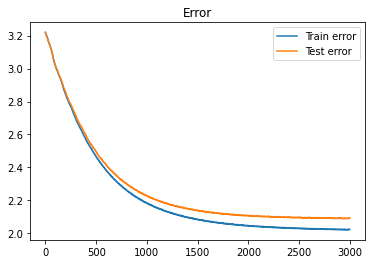

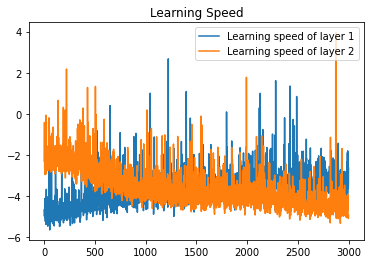

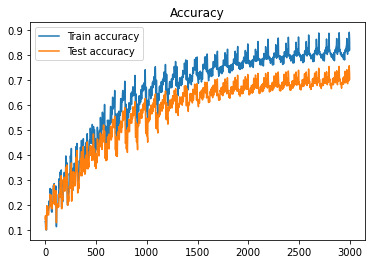

In [5]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

np.random.seed(42)


#Using data loader from previous assignment

def load_mnist(kind='train'):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = ('%s-labels-idx1-ubyte.gz' % kind)
    images_path = ('%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


x_train, y_train = load_mnist(kind='train')
x_test, y_test = load_mnist(kind='t10k')

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

data_dict_train = dict()

for i in range(10):
    data_dict_train[i] = list()

for i in range(len(x_train)):
    data_dict_train[y_train[i]].append(x_train[i])
    

train_x = list()
train_y = list()

for i in range(len(data_dict_train)):
    for j in range(100):
        train_x.append(data_dict_train[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

data_dict_test = dict()

for i in range(10):
    data_dict_test[i] = list()

for i in range(len(x_test)):
    data_dict_test[y_test[i]].append(x_test[i])
    

test_x = list()
test_y = list()

for i in range(len(data_dict_test)):
    for j in range(100):
        test_x.append(data_dict_test[i][j])
        test_y.append(i)

test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

#Initializing training labels
init_train_labels = np.zeros((train_x.shape[0], len(np.unique(train_y))))
init_train_labels[np.arange(train_x.shape[0]), train_y.astype(int)] = 1
init_test_labels = np.zeros((test_x.shape[0], len(np.unique(test_y))))
init_test_labels[np.arange(test_x.shape[0]), test_y.astype(int)] = 1
train_y = init_train_labels
test_y = init_test_labels

#Normalizing the dataset
mean = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0) + 1e-7
train_x = (train_x-mean)/std
test_x = (test_x-mean)/std

#Initializing the weights and biases
w1 = tf.Variable(tf.truncated_normal((30, 784), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b1 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w2 = tf.Variable(tf.truncated_normal((10, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b2 = tf.Variable(tf.truncated_normal((10, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

#Constructing the network
a = tf.add(tf.matmul(x, w1, transpose_b=True), b1)
z = tf.nn.sigmoid(a)
pred_y = tf.add(tf.matmul(z, w2, transpose_b=True), b2)
pred_y =  tf.sigmoid(pred_y)
yhat = tf.argmax(pred_y, axis=1)

regularization = tf.constant(0.005, dtype=tf.float32)
#Defining the update rule
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred_y)) + regularization*(tf.reduce_sum(tf.pow(w1, 2)) + tf.reduce_sum(tf.pow(w2, 2)))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_accuracy_list = list()
test_accuracy_list = list()
train_error_list = list()
test_error_list = list()
learning_speed_1 = list()
learning_speed_2 = list()

#Training and collecting the values for plotting
w1a = sess.run(w1)    
w2a = sess.run(w2)
for epoch in range(30):
    for i in range(100):
        idx = i*10
        sess.run(optimizer, feed_dict={x: train_x[idx: idx+10, :], y: train_y[idx:idx+10, :]})

        w1b = sess.run(w1)
        w2b = sess.run(w2)

        learning_speed_1.append(np.mean(np.abs((w1b-w1a)/w1a)))
        learning_speed_2.append(np.mean(np.abs((w2b-w2a)/w2a)))

        w1a = sess.run(w1)
        w2a = sess.run(w2)

        train_error = sess.run(cost, feed_dict={x: train_x, y: train_y})
        test_error = sess.run(cost, feed_dict={x: test_x, y: test_y})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(yhat, feed_dict={x: train_x}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) == sess.run(yhat, feed_dict={x: test_x}))

        train_error_list.append(train_error)
        test_error_list.append(test_error)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)

    print("Epochs completed:", epoch+1)

print("\n \n Performance without regularization \n \n")
#Visualizing the performance
plt.plot(train_error_list, label='Train error')
plt.plot(test_error_list, label='Test error')
plt.legend()
plt.title('Error')
plt.show()


plt.plot(np.log(learning_speed_1), label='Learning speed of layer 1')
plt.plot(np.log(learning_speed_2), label='Learning speed of layer 2')
plt.legend()
plt.title('Learning Speed')
plt.show()

plt.plot(train_accuracy_list, label='Train accuracy')
plt.plot(test_accuracy_list, label='Test accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

sess.close()

In [6]:
%reset
#2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Repeat 2 (a) with 2 hidden layers of 30 sigmoid nodes each, 3 hidden layers of 30 sigmoid nodes each, and with and without L2 regularization lambda vertical line w vertical line squared and lambda equals 5. (You will repeat 2(a) for 5 times: 1 for 2 hidden layer network; 1 for 3 hidden layer network; and 1 times each for 1, 2, 3 hidden layers with regularization.)

Epochs completed: 1
Epochs completed: 2
Epochs completed: 3
Epochs completed: 4
Epochs completed: 5
Epochs completed: 6
Epochs completed: 7
Epochs completed: 8
Epochs completed: 9
Epochs completed: 10
Epochs completed: 11
Epochs completed: 12
Epochs completed: 13
Epochs completed: 14
Epochs completed: 15
Epochs completed: 16
Epochs completed: 17
Epochs completed: 18
Epochs completed: 19
Epochs completed: 20
Epochs completed: 21
Epochs completed: 22
Epochs completed: 23
Epochs completed: 24
Epochs completed: 25
Epochs completed: 26
Epochs completed: 27
Epochs completed: 28
Epochs completed: 29
Epochs completed: 30

 
 Performance with regularization 
 



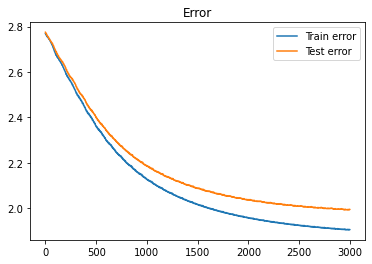

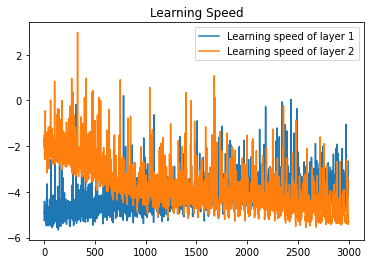

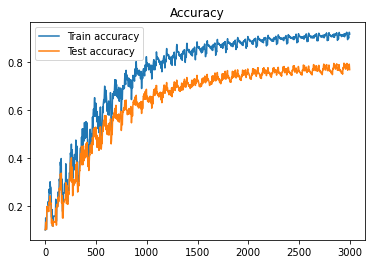

In [7]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

np.random.seed(42)


#Using data loader from previous assignment

def load_mnist(kind='train'):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = ('%s-labels-idx1-ubyte.gz' % kind)
    images_path = ('%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


x_train, y_train = load_mnist(kind='train')
x_test, y_test = load_mnist(kind='t10k')

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

data_dict_train = dict()

for i in range(10):
    data_dict_train[i] = list()

for i in range(len(x_train)):
    data_dict_train[y_train[i]].append(x_train[i])
    

train_x = list()
train_y = list()

for i in range(len(data_dict_train)):
    for j in range(100):
        train_x.append(data_dict_train[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

data_dict_test = dict()

for i in range(10):
    data_dict_test[i] = list()

for i in range(len(x_test)):
    data_dict_test[y_test[i]].append(x_test[i])
    

test_x = list()
test_y = list()

for i in range(len(data_dict_test)):
    for j in range(100):
        test_x.append(data_dict_test[i][j])
        test_y.append(i)

test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

#Initializing training labels
init_train_labels = np.zeros((train_x.shape[0], len(np.unique(train_y))))
init_train_labels[np.arange(train_x.shape[0]), train_y.astype(int)] = 1
init_test_labels = np.zeros((test_x.shape[0], len(np.unique(test_y))))
init_test_labels[np.arange(test_x.shape[0]), test_y.astype(int)] = 1
train_y = init_train_labels
test_y = init_test_labels

#Normalizing the dataset
mean = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)+1e-7
train_x = (train_x-mean)/std
test_x = (test_x-mean)/std

#Initializing the weights and biases
w1 = tf.Variable(tf.truncated_normal((30, 784), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b1 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w2 = tf.Variable(tf.truncated_normal((10, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b2 = tf.Variable(tf.truncated_normal((10, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

#Constructing the network
a = tf.add(tf.matmul(x, w1, transpose_b=True), b1)
z = tf.nn.sigmoid(a)
pred_y = tf.add(tf.matmul(z, w2, transpose_b=True), b2)
pred_y =  tf.sigmoid(pred_y)
yhat = tf.argmax(pred_y, axis=1)

regularization = tf.constant(0.005, dtype=tf.float32)
#Defining the update rule
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred_y)) + regularization*(tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_accuracy_list = list()
test_accuracy_list = list()
train_error_list = list()
test_error_list = list()
learning_speed_1 = list()
learning_speed_2 = list()

#Training and collecting the values for plotting
w1a = sess.run(w1)    
w2a = sess.run(w2)
for epoch in range(30):
    for i in range(100):
        idx = i*10
        sess.run(optimizer, feed_dict={x: train_x[idx: idx+10, :], y: train_y[idx:idx+10, :]})

        w1b = sess.run(w1)
        w2b = sess.run(w2)

        learning_speed_1.append(np.mean(np.abs((w1b-w1a)/w1a)))
        learning_speed_2.append(np.mean(np.abs((w2b-w2a)/w2a)))

        w1a = sess.run(w1)
        w2a = sess.run(w2)

        train_error = sess.run(cost, feed_dict={x: train_x, y: train_y})
        test_error = sess.run(cost, feed_dict={x: test_x, y: test_y})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(yhat, feed_dict={x: train_x}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) == sess.run(yhat, feed_dict={x: test_x}))

        train_error_list.append(train_error)
        test_error_list.append(test_error)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)

    print("Epochs completed:", epoch+1)

print("\n \n Performance with regularization \n \n")
#Visualizing the performance
plt.plot(train_error_list, label='Train error')
plt.plot(test_error_list, label='Test error')
plt.legend()
plt.title('Error')
plt.show()


plt.plot(np.log(learning_speed_1), label='Learning speed of layer 1')
plt.plot(np.log(learning_speed_2), label='Learning speed of layer 2')
plt.legend()
plt.title('Learning Speed')
plt.show()

plt.plot(train_accuracy_list, label='Train accuracy')
plt.plot(test_accuracy_list, label='Test accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

sess.close()

In [8]:
%reset
#3

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Epochs completed: 1
Epochs completed: 2
Epochs completed: 3
Epochs completed: 4
Epochs completed: 5
Epochs completed: 6
Epochs completed: 7
Epochs completed: 8
Epochs completed: 9
Epochs completed: 10
Epochs completed: 11
Epochs completed: 12
Epochs completed: 13
Epochs completed: 14
Epochs completed: 15
Epochs completed: 16
Epochs completed: 17
Epochs completed: 18
Epochs completed: 19
Epochs completed: 20
Epochs completed: 21
Epochs completed: 22
Epochs completed: 23
Epochs completed: 24
Epochs completed: 25
Epochs completed: 26
Epochs completed: 27
Epochs completed: 28
Epochs completed: 29
Epochs completed: 30

 
 Performance without regularization 
 



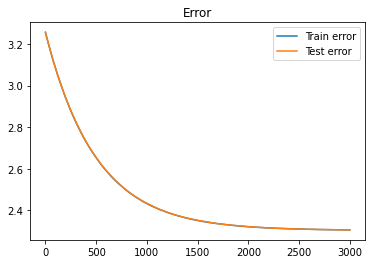

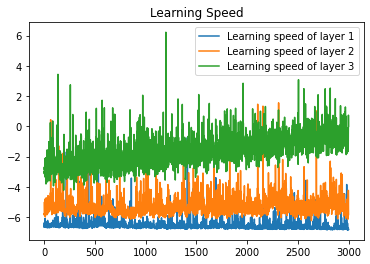

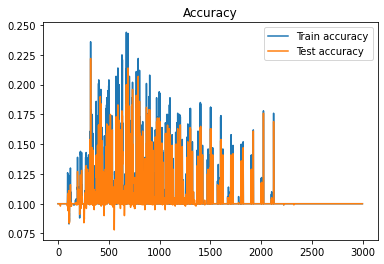

In [9]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

np.random.seed(42)
#Loading the dataset
train_x = np.load('train_x_file.npy')
train_y = np.load('train_y_file.npy')
test_x = np.load('test_x_file.npy')
test_y = np.load('test_y_file.npy')
train_y = train_y.flatten()
test_y = test_y.flatten()

#Initializing training labels
init_train_labels = np.zeros((train_x.shape[0], len(np.unique(train_y))))
init_train_labels[np.arange(train_x.shape[0]), train_y.astype(int)] = 1
init_test_labels = np.zeros((test_x.shape[0], len(np.unique(test_y))))
init_test_labels[np.arange(test_x.shape[0]), test_y.astype(int)] = 1
train_y = init_train_labels
test_y = init_test_labels

#Normalizing the dataset
mean = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)+1e-7
train_x = (train_x-mean)/std
test_x = (test_x-mean)/std

#Initializing the weights and biases
w1 = tf.Variable(tf.truncated_normal((30, 784), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b1 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w2 = tf.Variable(tf.truncated_normal((30, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b2 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w3 = tf.Variable(tf.truncated_normal((10, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b3 = tf.Variable(tf.truncated_normal((10, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

#Constructing the network
a_1 = tf.add(tf.matmul(x, w1, transpose_b=True), b1)
z_1 = tf.nn.sigmoid(a_1)
a_2 = tf.add(tf.matmul(z_1, w2, transpose_b=True), b2)
z_2 = tf.nn.sigmoid(a_2)
pred_y = tf.add(tf.matmul(z_2, w3, transpose_b=True), b3)
pred_y =  tf.sigmoid(pred_y)
yhat = tf.argmax(pred_y, axis=1)

regularization = tf.constant(0.005, dtype=tf.float32)
#Defining the update rule
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred_y)) + regularization*(tf.reduce_sum(tf.pow(w1, 2)) + tf.reduce_sum(tf.pow(w2, 2)) + tf.reduce_sum(tf.pow(w3, 2)))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

w1a = sess.run(w1)
w2a = sess.run(w2)
w3a = sess.run(w3)

train_accuracy_list = list()
test_accuracy_list = list()
train_error_list = list()
test_error_list = list()
learning_speed_1 = list()
learning_speed_2 = list()
learning_speed_3 = list()

#Training and collecting the values for plotting
for epoch in range(30):
    for i in range(100):
        idx = i*10
        sess.run(optimizer, feed_dict={x: train_x[idx: idx+10, :], y: train_y[idx:idx+10, :]})

        w1b = sess.run(w1)
        w2b = sess.run(w2)
        w3b = sess.run(w3)
        
        learning_speed_1.append(np.mean(np.abs((w1b-w1a)/w1a)))
        learning_speed_2.append(np.mean(np.abs((w2b-w2a)/w2a)))
        learning_speed_3.append(np.mean(np.abs((w3b-w3a)/w3a)))

        w1a = sess.run(w1)
        w2a = sess.run(w2)
        w3a = sess.run(w3)
        
        train_loss = sess.run(loss, feed_dict={x: train_x, y: train_y})
        test_loss = sess.run(loss, feed_dict={x: train_x, y: test_y})
        
        train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(yhat, feed_dict={x: train_x}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) == sess.run(yhat, feed_dict={x: test_x}))
        
        train_error_list.append(train_loss)
        test_error_list.append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        
    print("Epochs completed:", epoch+1)
    
print("\n \n Performance without regularization \n \n")
#Visualizing the performance
plt.plot(train_error_list, label='Train error')
plt.plot(test_error_list, label='Test error')
plt.legend()
plt.title('Error')
plt.show()

plt.plot(np.log(learning_speed_1), label='Learning speed of layer 1')
plt.plot(np.log(learning_speed_2), label='Learning speed of layer 2')
plt.plot(np.log(learning_speed_3), label='Learning speed of layer 3')
plt.legend()
plt.title('Learning Speed')
plt.show()

plt.plot(train_accuracy_list, label='Train accuracy')
plt.plot(test_accuracy_list, label='Test accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

sess.close()

In [10]:
%reset
#4

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Epochs completed: 1
Epochs completed: 2
Epochs completed: 3
Epochs completed: 4
Epochs completed: 5
Epochs completed: 6
Epochs completed: 7
Epochs completed: 8
Epochs completed: 9
Epochs completed: 10
Epochs completed: 11
Epochs completed: 12
Epochs completed: 13
Epochs completed: 14
Epochs completed: 15
Epochs completed: 16
Epochs completed: 17
Epochs completed: 18
Epochs completed: 19
Epochs completed: 20
Epochs completed: 21
Epochs completed: 22
Epochs completed: 23
Epochs completed: 24
Epochs completed: 25
Epochs completed: 26
Epochs completed: 27
Epochs completed: 28
Epochs completed: 29
Epochs completed: 30

 
 Performance with regularization 
 



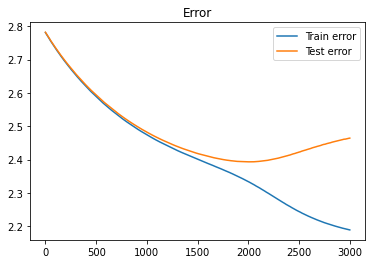

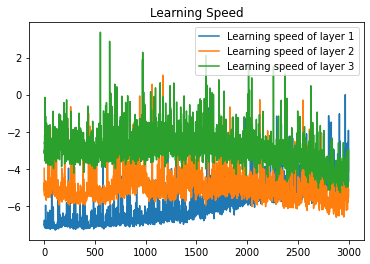

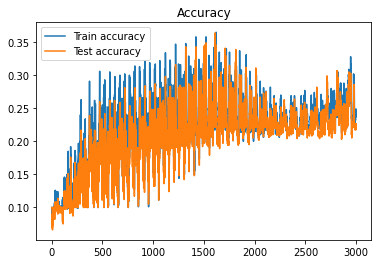

In [11]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

np.random.seed(42)
#Loading the dataset
train_x = np.load('train_x_file.npy')
train_y = np.load('train_y_file.npy')
test_x = np.load('test_x_file.npy')
test_y = np.load('test_y_file.npy')
train_y = train_y.flatten()
test_y = test_y.flatten()

#Initializing training labels
init_train_labels = np.zeros((train_x.shape[0], len(np.unique(train_y))))
init_train_labels[np.arange(train_x.shape[0]), train_y.flatten().astype(int)] = 1
init_test_labels = np.zeros((test_x.shape[0], len(np.unique(test_y))))
init_test_labels[np.arange(test_x.shape[0]), test_y.astype(int)] = 1
train_y = init_train_labels
test_y = init_test_labels

#Normalizing the dataset
mean = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)+1e-7
train_x = (train_x-mean)/std
test_x = (test_x-mean)/std

#Initializing the weights and biases
w1 = tf.Variable(tf.truncated_normal((30, 784), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b1 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w2 = tf.Variable(tf.truncated_normal((30, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b2 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w3 = tf.Variable(tf.truncated_normal((10, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b3 = tf.Variable(tf.truncated_normal((10, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

#Constructing the network
a_1 = tf.add(tf.matmul(x, w1, transpose_b=True), b1)
z_1 = tf.nn.sigmoid(a_1)
a_2 = tf.add(tf.matmul(z_1, w2, transpose_b=True), b2)
z_2 = tf.nn.sigmoid(a_2)
pred_y = tf.add(tf.matmul(z_2, w3, transpose_b=True), b3)
pred_y =  tf.sigmoid(pred_y)
yhat = tf.argmax(pred_y, axis=1)

regularization = tf.constant(0.005, dtype=tf.float32)
#Defining the update rule
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred_y)) + regularization*(tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2) + tf.nn.l2_loss(w3))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Training and collecting the values for plotting
w1a = sess.run(w1)
w2a = sess.run(w2)
w3a = sess.run(w3)

train_accuracy_list = list()
test_accuracy_list = list()
train_error_list = list()
test_error_list = list()
learning_speed_1 = list()
learning_speed_2 = list()
learning_speed_3 = list()

for epoch in range(30):
    for i in range(100):
        idx = i*10
        sess.run(optimizer, feed_dict={x: train_x[idx: idx+10, :], y: train_y[idx:idx+10, :]})

        w1b = sess.run(w1)
        w2b = sess.run(w2)
        w3b = sess.run(w3)
        
        learning_speed_1.append(np.mean(np.abs((w1b-w1a)/w1a)))
        learning_speed_2.append(np.mean(np.abs((w2b-w2a)/w2a)))
        learning_speed_3.append(np.mean(np.abs((w3b-w3a)/w3a)))

        w1a = sess.run(w1)
        w2a = sess.run(w2)
        w3a = sess.run(w3)
        
        train_loss = sess.run(loss, feed_dict={x: train_x, y: train_y})
        test_loss = sess.run(loss, feed_dict={x: train_x, y: test_y})
        
        train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(yhat, feed_dict={x: train_x}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) == sess.run(yhat, feed_dict={x: test_x}))
        
        train_error_list.append(train_loss)
        test_error_list.append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        
    print("Epochs completed:", epoch+1)
    
print("\n \n Performance with regularization \n \n")
#Visualizing the performance
plt.plot(train_error_list, label='Train error')
plt.plot(test_error_list, label='Test error')
plt.legend()
plt.title('Error')
plt.show()

plt.plot(np.log(learning_speed_1), label='Learning speed of layer 1')
plt.plot(np.log(learning_speed_2), label='Learning speed of layer 2')
plt.plot(np.log(learning_speed_3), label='Learning speed of layer 3')
plt.legend()
plt.title('Learning Speed')
plt.show()

plt.plot(train_accuracy_list, label='Train accuracy')
plt.plot(test_accuracy_list, label='Test accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

sess.close()

In [12]:
%reset
#5

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Epochs completed: 1
Epochs completed: 2
Epochs completed: 3
Epochs completed: 4
Epochs completed: 5
Epochs completed: 6
Epochs completed: 7
Epochs completed: 8
Epochs completed: 9
Epochs completed: 10
Epochs completed: 11
Epochs completed: 12
Epochs completed: 13
Epochs completed: 14
Epochs completed: 15
Epochs completed: 16
Epochs completed: 17
Epochs completed: 18
Epochs completed: 19
Epochs completed: 20
Epochs completed: 21
Epochs completed: 22
Epochs completed: 23
Epochs completed: 24
Epochs completed: 25
Epochs completed: 26
Epochs completed: 27
Epochs completed: 28
Epochs completed: 29
Epochs completed: 30

 
 Performance without regularization 
 



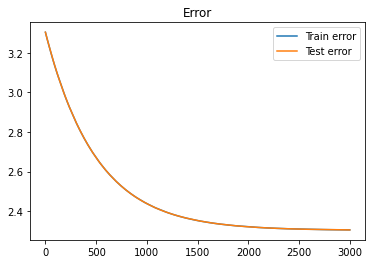

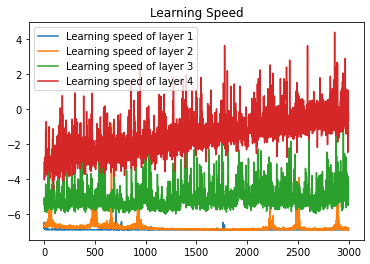

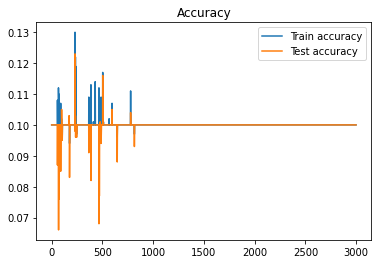

In [13]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

np.random.seed(42)

#Loading the dataset
train_x = np.load('train_x_file.npy')
train_y = np.load('train_y_file.npy')
test_x = np.load('test_x_file.npy')
test_y = np.load('test_y_file.npy')
train_y = train_y.flatten()
test_y = test_y.flatten()

#Initializing training labels
init_train_labels = np.zeros((train_x.shape[0], len(np.unique(train_y))))
init_train_labels[np.arange(train_x.shape[0]), train_y.flatten().astype(int)] = 1
init_test_labels = np.zeros((test_x.shape[0], len(np.unique(test_y))))
init_test_labels[np.arange(test_x.shape[0]), test_y.astype(int)] = 1
train_y = init_train_labels
test_y = init_test_labels

#Normalizing the dataset
mean = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)+1e-7
train_x = (train_x-mean)/std
test_x = (test_x-mean)/std

#Initializing the weights and biases
w1 = tf.Variable(tf.truncated_normal((30, 784), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b1 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w2 = tf.Variable(tf.truncated_normal((30, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b2 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w3 = tf.Variable(tf.truncated_normal((30, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b3 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w4 = tf.Variable(tf.truncated_normal((10, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b4 = tf.Variable(tf.truncated_normal((10, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

#Constructing the network
a_1 = tf.add(tf.matmul(x, w1, transpose_b=True), b1)
z_1 = tf.nn.sigmoid(a_1)
a_2 = tf.add(tf.matmul(z_1, w2, transpose_b=True), b2)
z_2 = tf.nn.sigmoid(a_2)
a_3 = tf.add(tf.matmul(z_2, w3, transpose_b=True), b3)
z_3 = tf.nn.sigmoid(a_3)
pred_y = tf.add(tf.matmul(z_3, w4, transpose_b=True), b4)
pred_y =  tf.sigmoid(pred_y)
yhat = tf.argmax(pred_y, axis=1)

regularization = tf.constant(0.005, dtype=tf.float32)
#Defining the update rule
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred_y)) + regularization*(tf.reduce_sum(tf.pow(w1, 2)) + tf.reduce_sum(tf.pow(w2, 2)) + tf.reduce_sum(tf.pow(w3, 2)) + tf.reduce_sum(tf.pow(w4, 2)))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

w1a = sess.run(w1)
w2a = sess.run(w2)
w3a = sess.run(w3)
w4a = sess.run(w4)

train_accuracy_list = list()
test_accuracy_list = list()
train_error_list = list()
test_error_list = list()
learning_speed_1 = list()
learning_speed_2 = list()
learning_speed_3 = list()
learning_speed_4 = list()

#Training and collecting the values for plotting
for epoch in range(30):
    for i in range(100):
        idx = i*10
        sess.run(optimizer, feed_dict={x: train_x[idx: idx+10, :], y: train_y[idx:idx+10, :]})

        w1b = sess.run(w1)
        w2b = sess.run(w2)
        w3b = sess.run(w3)
        w4b = sess.run(w4)
        
        learning_speed_1.append(np.mean(np.abs((w1b-w1a)/w1a)))
        learning_speed_2.append(np.mean(np.abs((w2b-w2a)/w2a)))
        learning_speed_3.append(np.mean(np.abs((w3b-w3a)/w3a)))
        learning_speed_4.append(np.mean(np.abs((w4b-w4a)/w4a)))

        w1a = sess.run(w1)
        w2a = sess.run(w2)
        w3a = sess.run(w3)
        w4a = sess.run(w4)
        
        train_loss = sess.run(loss, feed_dict={x: train_x, y: train_y})
        test_loss = sess.run(loss, feed_dict={x: train_x, y: test_y})
        
        train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(yhat, feed_dict={x: train_x}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) == sess.run(yhat, feed_dict={x: test_x}))
        
        train_error_list.append(train_loss)
        test_error_list.append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        
    print("Epochs completed:", epoch+1)
    
print("\n \n Performance without regularization \n \n")
#Visualizing the performance
plt.plot(train_error_list, label='Train error')
plt.plot(test_error_list, label='Test error')
plt.legend()
plt.title('Error')
plt.show()

plt.plot(np.log(learning_speed_1), label='Learning speed of layer 1')
plt.plot(np.log(learning_speed_2), label='Learning speed of layer 2')
plt.plot(np.log(learning_speed_3), label='Learning speed of layer 3')
plt.plot(np.log(learning_speed_4), label='Learning speed of layer 4')
plt.legend()
plt.title('Learning Speed')
plt.show()

plt.plot(train_accuracy_list, label='Train accuracy')
plt.plot(test_accuracy_list, label='Test accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

sess.close()

In [14]:
%reset
#6

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Epochs completed: 1
Epochs completed: 2
Epochs completed: 3
Epochs completed: 4
Epochs completed: 5
Epochs completed: 6
Epochs completed: 7
Epochs completed: 8
Epochs completed: 9
Epochs completed: 10
Epochs completed: 11
Epochs completed: 12
Epochs completed: 13
Epochs completed: 14
Epochs completed: 15
Epochs completed: 16
Epochs completed: 17
Epochs completed: 18
Epochs completed: 19
Epochs completed: 20
Epochs completed: 21
Epochs completed: 22
Epochs completed: 23
Epochs completed: 24
Epochs completed: 25
Epochs completed: 26
Epochs completed: 27
Epochs completed: 28
Epochs completed: 29
Epochs completed: 30

 
 Performance with regularization 
 



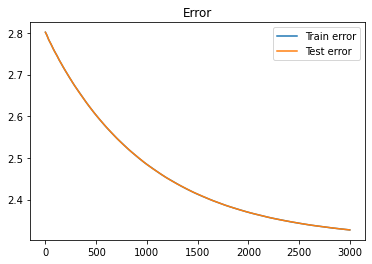

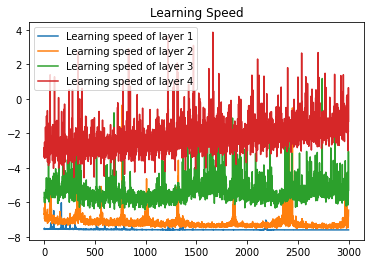

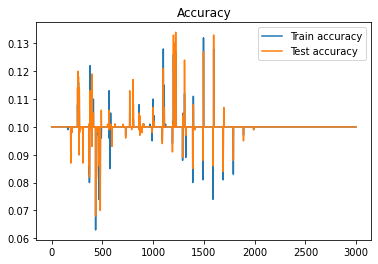

In [15]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

np.random.seed(42)
#Loading the dataset
train_x = np.load('train_x_file.npy')
train_y = np.load('train_y_file.npy')
test_x = np.load('test_x_file.npy')
test_y = np.load('test_y_file.npy')
train_y = train_y.flatten()
test_y = test_y.flatten()

#Initializing training labels
init_train_labels = np.zeros((train_x.shape[0], len(np.unique(train_y))))
init_train_labels[np.arange(train_x.shape[0]), train_y.flatten().astype(int)] = 1
init_test_labels = np.zeros((test_x.shape[0], len(np.unique(test_y))))
init_test_labels[np.arange(test_x.shape[0]), test_y.astype(int)] = 1
train_y = init_train_labels
test_y = init_test_labels

#Normalizing the dataset
m = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0) + 1e-10
train_x = (train_x - m) / std
test_x = (test_x - m) / std

#Initializing the weights and biases
w1 = tf.Variable(tf.truncated_normal((30, 784), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b1 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w2 = tf.Variable(tf.truncated_normal((30, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b2 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w3 = tf.Variable(tf.truncated_normal((30, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b3 = tf.Variable(tf.truncated_normal((30, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
w4 = tf.Variable(tf.truncated_normal((10, 30), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))
b4 = tf.Variable(tf.truncated_normal((10, ), mean=0.0, stddev=0.1, dtype=tf.float32, seed=None, name=None))

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

#Constructing the network
a_1 = tf.add(tf.matmul(x, w1, transpose_b=True), b1)
z_1 = tf.nn.sigmoid(a_1)
a_2 = tf.add(tf.matmul(z_1, w2, transpose_b=True), b2)
z_2 = tf.nn.sigmoid(a_2)
a_3 = tf.add(tf.matmul(z_2, w3, transpose_b=True), b3)
z_3 = tf.nn.sigmoid(a_3)
pred_y = tf.add(tf.matmul(z_3, w4, transpose_b=True), b4)
pred_y =  tf.sigmoid(pred_y)
yhat = tf.argmax(pred_y, axis=1)

regularization = tf.constant(0.005, dtype=tf.float32)
#Defining the update rule
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred_y)) + regularization*(tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2) + tf.nn.l2_loss(w3) + tf.nn.l2_loss(w4))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

w1a = sess.run(w1)
w2a = sess.run(w2)
w3a = sess.run(w3)
w4a = sess.run(w4)

train_accuracy_list = list()
test_accuracy_list = list()
train_error_list = list()
test_error_list = list()
learning_speed_1 = list()
learning_speed_2 = list()
learning_speed_3 = list()
learning_speed_4 = list()

#Training and collecting the values for plotting
for epoch in range(30):
    for i in range(100):
        idx = i*10
        sess.run(optimizer, feed_dict={x: train_x[idx: idx+10, :], y: train_y[idx:idx+10, :]})

        w1b = sess.run(w1)
        w2b = sess.run(w2)
        w3b = sess.run(w3)
        w4b = sess.run(w4)
        
        learning_speed_1.append(np.mean(np.abs((w1b-w1a)/w1a)))
        learning_speed_2.append(np.mean(np.abs((w2b-w2a)/w2a)))
        learning_speed_3.append(np.mean(np.abs((w3b-w3a)/w3a)))
        learning_speed_4.append(np.mean(np.abs((w4b-w4a)/w4a)))

        w1a = sess.run(w1)
        w2a = sess.run(w2)
        w3a = sess.run(w3)
        w4a = sess.run(w4)
        
        train_loss = sess.run(loss, feed_dict={x: train_x, y: train_y})
        test_loss = sess.run(loss, feed_dict={x: train_x, y: test_y})
        
        train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(yhat, feed_dict={x: train_x}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) == sess.run(yhat, feed_dict={x: test_x}))
        
        train_error_list.append(train_loss)
        test_error_list.append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        
    print("Epochs completed:", epoch+1)
    
print("\n \n Performance with regularization \n \n")
#Visualizing the performance
plt.plot(train_error_list, label='Train error')
plt.plot(test_error_list, label='Test error')
plt.legend()
plt.title('Error')
plt.show()

plt.plot(np.log(learning_speed_1), label='Learning speed of layer 1')
plt.plot(np.log(learning_speed_2), label='Learning speed of layer 2')
plt.plot(np.log(learning_speed_3), label='Learning speed of layer 3')
plt.plot(np.log(learning_speed_4), label='Learning speed of layer 4')
plt.legend()
plt.title('Learning Speed')
plt.show()

plt.plot(train_accuracy_list, label='Train accuracy')
plt.plot(test_accuracy_list, label='Test accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

sess.close()

In [14]:
%reset
#CNN

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Construct and train convolutional neural network for MNIST classification. Regularize the training of the neural network through dropout. Regularize the training of neural network through augment your selection of 1000 images by rotating them for 1-3 degrees clockwise and counter clockwise, and shifting them for 3 pixels in 8 different directions.

In [15]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import SGD


#Loading dataset, reshaping
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

#Normalizing dataset
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x/255.0
test_x = test_x/255.0

#Building the CNN model
model = keras.models.Sequential();
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
optimizer = SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=30, batch_size=10  , verbose=1)

#Obtaining the accuracy of the model
_, accuracy = model.evaluate(test_x, test_y, verbose=1)
print("Accuracy: ",accuracy*100, "%")

Epoch 1/30
60000/60000 [==============================] - 16s 267us/step - loss: 0.1461 - accuracy: 0.9550
Epoch 2/30
60000/60000 [==============================] - 16s 266us/step - loss: 0.0505 - accuracy: 0.9842
Epoch 3/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.0293 - accuracy: 0.9905
Epoch 4/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.0200 - accuracy: 0.9940
Epoch 5/30
60000/60000 [==============================] - 16s 261us/step - loss: 0.0126 - accuracy: 0.9960
Epoch 6/30
60000/60000 [==============================] - 16s 265us/step - loss: 0.0078 - accuracy: 0.9972
Epoch 7/30
60000/60000 [==============================] - 16s 265us/step - loss: 0.0058 - accuracy: 0.9981
Epoch 8/30
60000/60000 [==============================] - 16s 264us/step - loss: 0.0044 - accuracy: 0.9985
Epoch 9/30
60000/60000 [==============================] - 16s 261us/step - loss: 0.0029 - accuracy: 0.9992
Epoch 10/30
60000/60000 [============

In [16]:
%reset
#CNN with dropout

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import SGD


#Loading dataset, reshaping
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

#Normalizing dataset
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x/255.0
test_x = test_x/255.0

#Building the CNN model
model = keras.models.Sequential();
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
optimizer = SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=30, batch_size=10  , verbose=1)

#Obtaining the accuracy of the model
_, accuracy = model.evaluate(test_x, test_y, verbose=1)
print("Accuracy: ",accuracy*100, "%")

Epoch 1/30
60000/60000 [==============================] - 16s 266us/step - loss: 0.1828 - accuracy: 0.9434
Epoch 2/30
60000/60000 [==============================] - 16s 265us/step - loss: 0.0694 - accuracy: 0.9788
Epoch 3/30
60000/60000 [==============================] - 17s 279us/step - loss: 0.0491 - accuracy: 0.9845
Epoch 4/30
60000/60000 [==============================] - 16s 265us/step - loss: 0.0377 - accuracy: 0.9881
Epoch 5/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.0287 - accuracy: 0.9903
Epoch 6/30
60000/60000 [==============================] - 16s 267us/step - loss: 0.0244 - accuracy: 0.9918
Epoch 7/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.0200 - accuracy: 0.9937
Epoch 8/30
60000/60000 [==============================] - 16s 264us/step - loss: 0.0168 - accuracy: 0.9943
Epoch 9/30
60000/60000 [==============================] - 16s 264us/step - loss: 0.0140 - accuracy: 0.9954
Epoch 10/30
60000/60000 [============

In [13]:
%reset
#CNN trained with rotated and shift augmented dataset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

#Loading dataset, reshaping
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

#Normalizing dataset
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x/255.0
test_x = test_x/255.0

#Building the CNN model
model = keras.models.Sequential();
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
optimizer = SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#Augmenting dataset with 3 degree rotated and 3 pixel shifted image
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,
                             rotation_range=3, width_shift_range=3, height_shift_range=3, 
                             horizontal_flip=True)
model.fit_generator(datagen.flow(train_x, train_y, batch_size=10), steps_per_epoch=len(train_x)/10,
                    epochs=30, verbose=1)
# model.fit(train_x, train_y, epochs=30, batch_size=10  , verbose=1)

#Obtaining the accuracy of the model
_, accuracy = model.evaluate(test_x, test_y, verbose=1)
print("Accuracy: ",accuracy*100, "%")

Epoch 1/30
  22/6000 [..............................] - ETA: 55s - loss: 2.2778 - accuracy: 0.1364 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


6000/6000 [==============================] - 35s 6ms/step - loss: 0.5078 - accuracy: 0.8320
Epoch 2/30
6000/6000 [==============================] - 34s 6ms/step - loss: 0.2600 - accuracy: 0.9185
Epoch 3/30
6000/6000 [==============================] - 35s 6ms/step - loss: 0.2121 - accuracy: 0.9357
Epoch 4/30
6000/6000 [==============================] - 36s 6ms/step - loss: 0.1916 - accuracy: 0.9404
Epoch 5/30
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1768 - accuracy: 0.9466
Epoch 6/30
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1629 - accuracy: 0.9503
Epoch 7/30
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1542 - accuracy: 0.9523
Epoch 8/30
6000/6000 [==============================] - 34s 6ms/step - loss: 0.1514 - accuracy: 0.9540
Epoch 9/30
6000/6000 [==============================] - 33s 6ms/step - loss: 0.1474 - accuracy: 0.9558
Epoch 10/30
6000/6000 [==============================] - 33s 6ms/step - loss: 0.1381